# **Hi**

**This notebook is intended for forecasting the Forex market. While it doesn't achieve exceptional accuracy, it still has practical value. You can enhance the model's performance by providing more data and experimenting with different parameters and indicators. In this notebook, I utilized one year of Forex data for multiple currency pairs, aiming to predict the future price of the EUR/USD pair.**

**In the first step**

# 1. import the required libraries

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

print(pd.__version__)
print(tf.__version__)

2.2.2
2.15.0


# 2. Reading the data file 
through the pandas library and an overview of the data


In [2]:
data=pd.read_csv('/kaggle/input/forex-currency-pairs-dataset-in-1-hour-timeframe/forex-1year.csv')
print(data.shape)
data.head(10)

(6235, 37)


,date,clock,open_eurusd,high_eurusd,low_eurusd,close_eurusd,tikvol_eurusd,open_audusd,high_audusd,low_audusd,...,open_usdchf,high_usdchf,low_usdchf,close_usdchf,tikvol_usdchf,open_usdjpy,high_usdjpy,low_usdjpy,close_usdjpy,tikvol_usdjpy
0,2023.04.24,00:00:00,1.09883,1.09904,1.09861,1.09863,552,0.66947,0.66968,0.66906,...,1.09883,1.09904,1.09861,1.09863,552,1.09883,1.09904,1.09861,1.09863,552
1,2023.04.24,01:00:00,1.09868,1.09928,1.09862,1.09921,704,0.66932,0.66967,0.66885,...,1.09868,1.09928,1.09862,1.09921,704,1.09868,1.09928,1.09862,1.09921,704
2,2023.04.24,02:00:00,1.09921,1.09956,1.09906,1.09913,625,0.66945,0.66971,0.66903,...,1.09921,1.09956,1.09906,1.09913,625,1.09921,1.09956,1.09906,1.09913,625
3,2023.04.24,03:00:00,1.09913,1.09945,1.09839,1.09943,1451,0.66902,0.66948,0.66817,...,1.09913,1.09945,1.09839,1.09943,1451,1.09913,1.09945,1.09839,1.09943,1451
4,2023.04.24,04:00:00,1.09944,1.09944,1.09864,1.09869,1713,0.66944,0.66948,0.66818,...,1.09944,1.09944,1.09864,1.09869,1713,1.09944,1.09944,1.09864,1.09869,1713
5,2023.04.24,05:00:00,1.09869,1.09903,1.09798,1.09806,1673,0.66826,0.66882,0.66793,...,1.09869,1.09903,1.09798,1.09806,1673,1.09869,1.09903,1.09798,1.09806,1673
6,2023.04.24,06:00:00,1.09805,1.09843,1.09793,1.09811,1106,0.66799,0.66828,0.66770,...,1.09805,1.09843,1.09793,1.09811,1106,1.09805,1.09843,1.09793,1.09811,1106
7,2023.04.24,07:00:00,1.09808,1.09822,1.09790,1.09799,909,0.66792,0.66801,0.66715,...,1.09808,1.09822,1.09790,1.09799,909,1.09808,1.09822,1.09790,1.09799,909
8,2023.04.24,08:00:00,1.09799,1.09807,1.09721,1.09779,1442,0.66751,0.66763,0.66695,...,1.09799,1.09807,1.09721,1.09779,1442,1.09799,1.09807,1.09721,1.09779,1442
9,2023.04.24,09:00:00,1.09777,1.09860,1.09727,1.09743,2730,0.66753,0.66770,0.66650,...,1.09777,1.09860,1.09727,1.09743,2730,1.09777,1.09860,1.09727,1.09743,2730


# **3. Set the date**

1- Combination of time and date of the day

2- Creating a function to convert the object into a date

In [3]:
d_c=data['date']+data['clock']
import datetime
def str_date(x):
    spl_day=x.split('.')
    spl_clock=spl_day[2][2:].split(':')
    year,month,day=int(spl_day[0]),int(spl_day[1]),int(spl_day[2][:2])
    hour=int(spl_clock[0])
    a=datetime.datetime(year=year,month=month,day=day,hour=hour)
    return a
data['date']=d_c.apply(str_date)
data=data.drop(columns=['clock'], inplace=False)
data.head()

,date,open_eurusd,high_eurusd,low_eurusd,close_eurusd,tikvol_eurusd,open_audusd,high_audusd,low_audusd,close_audusd,...,open_usdchf,high_usdchf,low_usdchf,close_usdchf,tikvol_usdchf,open_usdjpy,high_usdjpy,low_usdjpy,close_usdjpy,tikvol_usdjpy
0,2023-04-24 00:00:00,1.09883,1.09904,1.09861,1.09863,552,0.66947,0.66968,0.66906,0.66926,...,1.09883,1.09904,1.09861,1.09863,552,1.09883,1.09904,1.09861,1.09863,552
1,2023-04-24 01:00:00,1.09868,1.09928,1.09862,1.09921,704,0.66932,0.66967,0.66885,0.66944,...,1.09868,1.09928,1.09862,1.09921,704,1.09868,1.09928,1.09862,1.09921,704
2,2023-04-24 02:00:00,1.09921,1.09956,1.09906,1.09913,625,0.66945,0.66971,0.66903,0.66903,...,1.09921,1.09956,1.09906,1.09913,625,1.09921,1.09956,1.09906,1.09913,625
3,2023-04-24 03:00:00,1.09913,1.09945,1.09839,1.09943,1451,0.66902,0.66948,0.66817,0.66945,...,1.09913,1.09945,1.09839,1.09943,1451,1.09913,1.09945,1.09839,1.09943,1451
4,2023-04-24 04:00:00,1.09944,1.09944,1.09864,1.09869,1713,0.66944,0.66948,0.66818,0.66827,...,1.09944,1.09944,1.09864,1.09869,1713,1.09944,1.09944,1.09864,1.09869,1713


# 4- **Convert date column to data index**

In [4]:
data.index = data.pop('date')
data.head()

,open_eurusd,high_eurusd,low_eurusd,close_eurusd,tikvol_eurusd,open_audusd,high_audusd,low_audusd,close_audusd,tikvol_audusd,...,open_usdchf,high_usdchf,low_usdchf,close_usdchf,tikvol_usdchf,open_usdjpy,high_usdjpy,low_usdjpy,close_usdjpy,tikvol_usdjpy
date,,,,,,,,,,,,,,,,,,,,,
2023-04-24 00:00:00,1.09883,1.09904,1.09861,1.09863,552,0.66947,0.66968,0.66906,0.66926,422,...,1.09883,1.09904,1.09861,1.09863,552,1.09883,1.09904,1.09861,1.09863,552
2023-04-24 01:00:00,1.09868,1.09928,1.09862,1.09921,704,0.66932,0.66967,0.66885,0.66944,903,...,1.09868,1.09928,1.09862,1.09921,704,1.09868,1.09928,1.09862,1.09921,704
2023-04-24 02:00:00,1.09921,1.09956,1.09906,1.09913,625,0.66945,0.66971,0.66903,0.66903,859,...,1.09921,1.09956,1.09906,1.09913,625,1.09921,1.09956,1.09906,1.09913,625
2023-04-24 03:00:00,1.09913,1.09945,1.09839,1.09943,1451,0.66902,0.66948,0.66817,0.66945,2023,...,1.09913,1.09945,1.09839,1.09943,1451,1.09913,1.09945,1.09839,1.09943,1451
2023-04-24 04:00:00,1.09944,1.09944,1.09864,1.09869,1713,0.66944,0.66948,0.66818,0.66827,2647,...,1.09944,1.09944,1.09864,1.09869,1713,1.09944,1.09944,1.09864,1.09869,1713


# 5- **A quick look at the EUR/USD currency pair**

In [5]:
import plotly.graph_objects as gr

candle = gr.Figure(data=[gr.Candlestick(open=data['open_eurusd'][:120],
                high=data['high_eurusd'][:120],
                low=data['low_eurusd'][:120],
                close=data['close_eurusd'])][:120])
candle.show()

# 6-  look at the entire data
understand the dependence and relationships between currency pairs

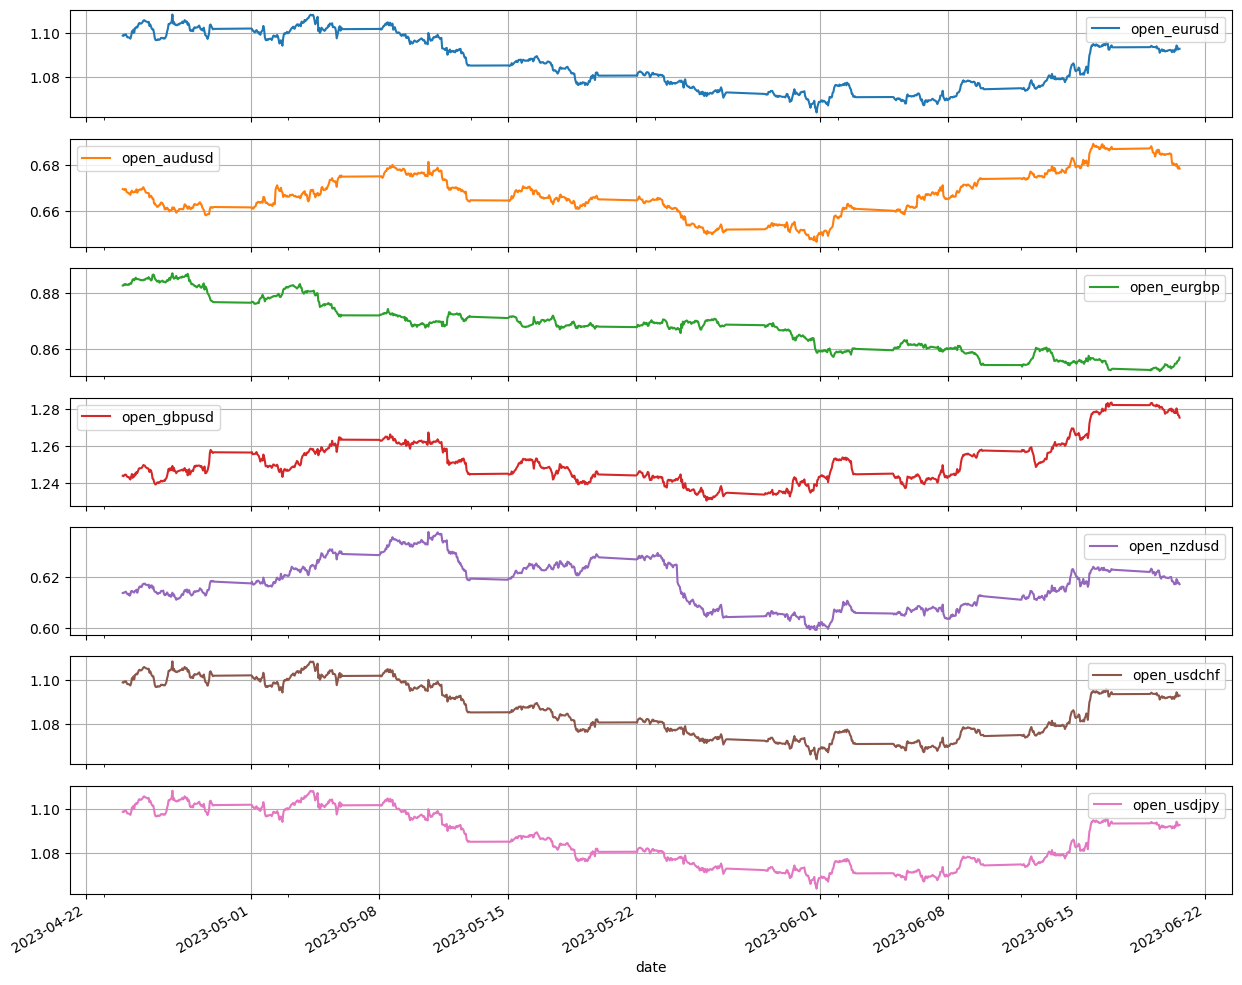

In [6]:
mpl.rcParams['figure.figsize'] = (15, 13)
mpl.rcParams['axes.grid'] = True


plot_cols = ['open_eurusd','open_audusd','open_eurgbp','open_gbpusd','open_nzdusd',
             'open_usdchf','open_usdjpy']

plot_features = data[plot_cols].iloc[0:1000,:]
_ = plot_features.plot(subplots=True)

# 7- Creating moving averages

6, 12 and 24 periods for EUR/USD**

In [7]:
open_close_mean_eurusd=(data.iloc[:,0] + data.iloc[:,3]) / 2
o_c=open_close_mean_eurusd.rolling(6).mean()
data['SMA-6']=o_c
data['SMA-6']=data['SMA-6'].fillna(open_close_mean_eurusd)

o_c=open_close_mean_eurusd.rolling(12).mean()
data['SMA-12']=o_c
data['SMA-12']=data['SMA-12'].fillna(open_close_mean_eurusd)

o_c=open_close_mean_eurusd.rolling(24).mean()
data['SMA-24']=o_c
data['SMA-24']=data['SMA-24'].fillna(open_close_mean_eurusd)


data.head(12)

,open_eurusd,high_eurusd,low_eurusd,close_eurusd,tikvol_eurusd,open_audusd,high_audusd,low_audusd,close_audusd,tikvol_audusd,...,close_usdchf,tikvol_usdchf,open_usdjpy,high_usdjpy,low_usdjpy,close_usdjpy,tikvol_usdjpy,SMA-6,SMA-12,SMA-24
date,,,,,,,,,,,,,,,,,,,,,
2023-04-24 00:00:00,1.09883,1.09904,1.09861,1.09863,552,0.66947,0.66968,0.66906,0.66926,422,...,1.09863,552,1.09883,1.09904,1.09861,1.09863,552,1.098730,1.098730,1.098730
2023-04-24 01:00:00,1.09868,1.09928,1.09862,1.09921,704,0.66932,0.66967,0.66885,0.66944,903,...,1.09921,704,1.09868,1.09928,1.09862,1.09921,704,1.098945,1.098945,1.098945
2023-04-24 02:00:00,1.09921,1.09956,1.09906,1.09913,625,0.66945,0.66971,0.66903,0.66903,859,...,1.09913,625,1.09921,1.09956,1.09906,1.09913,625,1.099170,1.099170,1.099170
2023-04-24 03:00:00,1.09913,1.09945,1.09839,1.09943,1451,0.66902,0.66948,0.66817,0.66945,2023,...,1.09943,1451,1.09913,1.09945,1.09839,1.09943,1451,1.099280,1.099280,1.099280
2023-04-24 04:00:00,1.09944,1.09944,1.09864,1.09869,1713,0.66944,0.66948,0.66818,0.66827,2647,...,1.09869,1713,1.09944,1.09944,1.09864,1.09869,1713,1.099065,1.099065,1.099065
2023-04-24 05:00:00,1.09869,1.09903,1.09798,1.09806,1673,0.66826,0.66882,0.66793,0.66800,2758,...,1.09806,1673,1.09869,1.09903,1.09798,1.09806,1673,1.098928,1.098375,1.098375
2023-04-24 06:00:00,1.09805,1.09843,1.09793,1.09811,1106,0.66799,0.66828,0.66770,0.66792,1878,...,1.09811,1106,1.09805,1.09843,1.09793,1.09811,1106,1.098819,1.098080,1.098080
2023-04-24 07:00:00,1.09808,1.09822,1.09790,1.09799,909,0.66792,0.66801,0.66715,0.66750,1398,...,1.09799,909,1.09808,1.09822,1.09790,1.09799,909,1.098667,1.098035,1.098035
2023-04-24 08:00:00,1.09799,1.09807,1.09721,1.09779,1442,0.66751,0.66763,0.66695,0.66755,1985,...,1.09779,1442,1.09799,1.09807,1.09721,1.09779,1442,1.098454,1.097890,1.097890


# 8- **Creating a MACD indicator on the EUR-USD currency pair**

In [8]:
ema12= open_close_mean_eurusd.ewm(span=12, adjust=False).mean()
ema26= open_close_mean_eurusd.ewm(span=26, adjust=False).mean()

macd_line=ema12-ema26

signal_line=macd_line.ewm(span=9, adjust=False).mean()

histogram=macd_line-signal_line


data['macd line']=macd_line
data['macd signal']=signal_line
data['macd histogram']=histogram

data.head(10)

,open_eurusd,high_eurusd,low_eurusd,close_eurusd,tikvol_eurusd,open_audusd,high_audusd,low_audusd,close_audusd,tikvol_audusd,...,high_usdjpy,low_usdjpy,close_usdjpy,tikvol_usdjpy,SMA-6,SMA-12,SMA-24,macd line,macd signal,macd histogram
date,,,,,,,,,,,,,,,,,,,,,
2023-04-24 00:00:00,1.09883,1.09904,1.09861,1.09863,552,0.66947,0.66968,0.66906,0.66926,422,...,1.09904,1.09861,1.09863,552,1.098730,1.098730,1.098730,0.000000,0.000000,0.000000e+00
2023-04-24 01:00:00,1.09868,1.09928,1.09862,1.09921,704,0.66932,0.66967,0.66885,0.66944,903,...,1.09928,1.09862,1.09921,704,1.098945,1.098945,1.098945,0.000017,0.000003,1.372080e-05
2023-04-24 02:00:00,1.09921,1.09956,1.09906,1.09913,625,0.66945,0.66971,0.66903,0.66903,859,...,1.09956,1.09906,1.09913,625,1.099170,1.099170,1.099170,0.000048,0.000012,3.592916e-05
2023-04-24 03:00:00,1.09913,1.09945,1.09839,1.09943,1451,0.66902,0.66948,0.66817,0.66945,2023,...,1.09945,1.09839,1.09943,1451,1.099280,1.099280,1.099280,0.000081,0.000026,5.487225e-05
2023-04-24 04:00:00,1.09944,1.09944,1.09864,1.09869,1713,0.66944,0.66948,0.66818,0.66827,2647,...,1.09944,1.09864,1.09869,1713,1.099065,1.099065,1.099065,0.000089,0.000039,4.990989e-05
2023-04-24 05:00:00,1.09869,1.09903,1.09798,1.09806,1673,0.66826,0.66882,0.66793,0.66800,2758,...,1.09903,1.09798,1.09806,1673,1.098928,1.098375,1.098375,0.000038,0.000039,-2.029474e-07
2023-04-24 06:00:00,1.09805,1.09843,1.09793,1.09811,1106,0.66799,0.66828,0.66770,0.66792,1878,...,1.09843,1.09793,1.09811,1106,1.098819,1.098080,1.098080,-0.000025,0.000026,-5.077980e-05
2023-04-24 07:00:00,1.09808,1.09822,1.09790,1.09799,909,0.66792,0.66801,0.66715,0.66750,1398,...,1.09822,1.09790,1.09799,909,1.098667,1.098035,1.098035,-0.000078,0.000005,-8.292600e-05
2023-04-24 08:00:00,1.09799,1.09807,1.09721,1.09779,1442,0.66751,0.66763,0.66695,0.66755,1985,...,1.09807,1.09721,1.09779,1442,1.098454,1.097890,1.097890,-0.000130,-0.000022,-1.080278e-04


# 9- **A quick look at MACD**

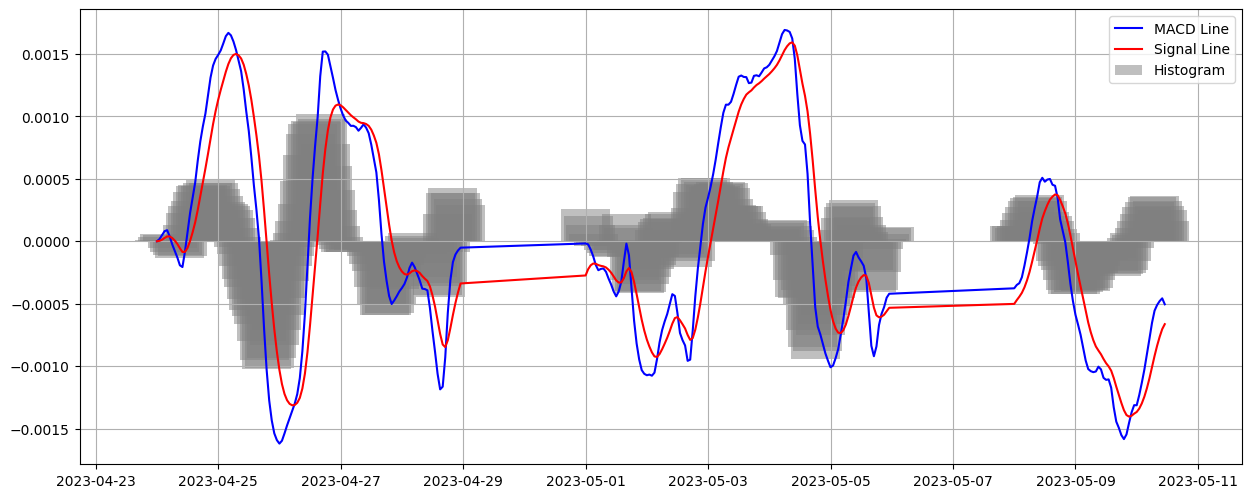

In [9]:
plt.subplot(2, 1, 2)
plt.plot(data['macd line'][0:300], label='MACD Line', color='blue')
plt.plot(data['macd signal'][0:300,], label='Signal Line', color='red')
plt.bar(data.iloc[0:300,].index, data['macd histogram'][0:300,], label='Histogram', color='grey', alpha=0.5)
plt.legend()
plt.show()

# 10. **creat Bollinger Bands indicator**

Bollinger Bands are a popular technical indicator used by traders

In [10]:
sma20=open_close_mean_eurusd.rolling(window=20).mean()
std20=open_close_mean_eurusd.rolling(window=20).std()

data['mid boll']=sma20.fillna(open_close_mean_eurusd)
data['up boll']=(sma20 + 2*std20).fillna(open_close_mean_eurusd)
data['low boll']=(sma20 - 2*std20).fillna(open_close_mean_eurusd)

data.iloc[15:25,]

,open_eurusd,high_eurusd,low_eurusd,close_eurusd,tikvol_eurusd,open_audusd,high_audusd,low_audusd,close_audusd,tikvol_audusd,...,tikvol_usdjpy,SMA-6,SMA-12,SMA-24,macd line,macd signal,macd histogram,mid boll,up boll,low boll
date,,,,,,,,,,,,,,,,,,,,,
2023-04-24 15:00:00,1.10018,1.10245,1.09988,1.10226,3279,0.66813,0.66881,0.66771,0.66851,2486,...,3279,1.100166,1.099170,1.101220,0.000471,0.000152,0.000319,1.101220,1.101220,1.101220
2023-04-24 16:00:00,1.10224,1.10308,1.10124,1.10234,4589,0.66850,0.66864,0.66733,0.66826,3711,...,4589,1.100879,1.099439,1.102290,0.000645,0.000251,0.000394,1.102290,1.102290,1.102290
2023-04-24 17:00:00,1.10232,1.10364,1.10201,1.10288,4588,0.66826,0.66973,0.66800,0.66936,3761,...,4588,1.101363,1.099791,1.102600,0.000799,0.000361,0.000439,1.102600,1.102600,1.102600
2023-04-24 18:00:00,1.10288,1.10317,1.10200,1.10254,3263,0.66936,0.66954,0.66775,0.66790,2658,...,3263,1.101748,1.100177,1.102710,0.000919,0.000472,0.000447,1.102710,1.102710,1.102710
2023-04-24 19:00:00,1.10254,1.10336,1.10243,1.10334,1900,0.66790,0.66848,0.66778,0.66848,1616,...,1900,1.102108,1.100585,1.102940,0.001021,0.000582,0.000439,1.099835,1.103382,1.096288
2023-04-24 20:00:00,1.10335,1.10478,1.10330,1.10435,1691,0.66848,0.66923,0.66843,0.66913,1240,...,1691,1.102602,1.101082,1.103850,0.001162,0.000698,0.000464,1.100091,1.104021,1.096162
2023-04-24 21:00:00,1.10435,1.10495,1.10414,1.10460,1515,0.66913,0.66935,0.66883,0.66922,1173,...,1515,1.103144,1.101655,1.104475,0.001309,0.000820,0.000489,1.100368,1.104714,1.096022
2023-04-24 22:00:00,1.10460,1.10464,1.10414,1.10427,1128,0.66922,0.66945,0.66908,0.66940,1286,...,1128,1.103502,1.102190,1.104435,0.001406,0.000938,0.000469,1.100631,1.105298,1.095964
2023-04-24 23:00:00,1.10429,1.10447,1.10428,1.10441,665,0.66939,0.66957,0.66934,0.66946,615,...,665,1.103793,1.102578,1.100576,0.001460,0.001042,0.000418,1.100884,1.105787,1.095982


# **11. plot bollinger bands indicator**

In [11]:
fig = gr.Figure()

fig.add_trace(gr.Scatter(x=data.index, y=data['close_eurusd'][20:1000], mode='lines', name='Price'))

fig.add_trace(gr.Scatter(x=data.index, y=data['up boll'][20:1000], mode='lines', name='Upper Bollinger Band', line=dict(color='red')))
fig.add_trace(gr.Scatter(x=data.index, y=data['low boll'][20:1000], fill='tonexty', mode='lines', name='Lower Bollinger Band', line=dict(color='green')))

fig.add_trace(gr.Scatter(x=data.index, y=data['mid boll'][20:1000], mode='lines', name='Middle Bollinger Band', line=dict(color='blue')))

fig.update_layout(title='Bollinger Bands',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  showlegend=True)

fig.show()

# **12. Target**

For the simplicity of the intended task, instead of predicting each chart's open, close, high, and low, I use the average of the open and close.

In [12]:
data['target']=(data['open_eurusd']+data['close_eurusd'])/2
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open_eurusd,6235.0,1.083266e+00,0.015162,1.045180,1.073105,1.084600,1.093725,1.125670
high_eurusd,6235.0,1.083874e+00,0.015167,1.046560,1.073630,1.085230,1.094365,1.127510
low_eurusd,6235.0,1.082662e+00,0.015147,1.044740,1.072495,1.084110,1.093175,1.124970
close_eurusd,6235.0,1.083265e+00,0.015161,1.045180,1.073110,1.084590,1.093735,1.125680
tikvol_eurusd,6235.0,4.552730e+03,4010.589931,356.000000,1952.000000,3561.000000,5757.000000,55702.000000
open_audusd,6235.0,6.565093e-01,0.013482,0.627410,0.646275,0.655950,0.666210,0.689390
high_audusd,6235.0,6.570770e-01,0.013491,0.627810,0.646875,0.656470,0.666940,0.689910
low_audusd,6235.0,6.559407e-01,0.013464,0.626940,0.645660,0.655440,0.665675,0.688690
close_audusd,6235.0,6.565106e-01,0.013483,0.627410,0.646240,0.655940,0.666230,0.689390
tikvol_audusd,6235.0,2.746026e+03,1587.682182,247.000000,1745.000000,2415.000000,3351.000000,16482.000000


# 13. to normalize
Looking at the data specifications in the table above, only the volumes have more distributed values

In [13]:
maximum=data.max()[:-1]
minimum=data.min()[:-1]
data_pre=(data.iloc[:,:-1]-minimum)/(maximum-minimum)
data_pre.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open_eurusd,6235.0,0.473171,0.188373,0.0,0.346938,0.489750,0.603118,1.0
high_eurusd,6235.0,0.460950,0.187356,0.0,0.334404,0.477702,0.590550,1.0
low_eurusd,6235.0,0.472668,0.188794,0.0,0.345943,0.490714,0.603702,1.0
close_eurusd,6235.0,0.473100,0.188340,0.0,0.346957,0.489565,0.603168,1.0
tikvol_eurusd,6235.0,0.075827,0.072464,0.0,0.028837,0.057908,0.097586,1.0
open_audusd,6235.0,0.469495,0.217525,0.0,0.304372,0.460471,0.626008,1.0
high_audusd,6235.0,0.471288,0.217249,0.0,0.307005,0.461514,0.630113,1.0
low_audusd,6235.0,0.469646,0.218037,0.0,0.303158,0.461538,0.627287,1.0
close_audusd,6235.0,0.469517,0.217535,0.0,0.303808,0.460310,0.626331,1.0
tikvol_audusd,6235.0,0.153928,0.097794,0.0,0.092270,0.133539,0.191192,1.0


# 14. making windows
I wrote a function to create time windows. I considered the length of my window to be 120, which is equivalent to 5 days or one week of the market

In [14]:
data1=data
data=data_pre
def create_windows(data, window_size,shift):
  windows = []
  for i in range(0, len(data)-239):
    window = np.array(data[ i + shift :i + shift + window_size])
    windows.append(window)
  return np.array(windows)

shift=0
window_size = 120
x = create_windows(data, window_size,shift)

window_size = 120
shift=120
y=create_windows(data1['target'], window_size,shift)
print(x.shape)
print(y.shape)

(5996, 120, 44)
(5996, 120)


# 15. Train / Validation / Test

In [15]:
dates=data.index

n_sample=len(x)

x_train=x[0:int(0.8*n_sample)]
y_train=y[0:int(0.8*n_sample)]

x_val=x[int(0.8*n_sample):int(0.9*n_sample)]
y_val=y[int(0.8*n_sample):int(0.9*n_sample)]

x_test=x[int(0.9*n_sample):]
y_test=y[int(0.9*n_sample):]

print('shape x train = ',x_train.shape,'  shape y train = ',y_train.shape,
      '\n  shape x test = ',x_test.shape, 'shape y test = ',y_test.shape,
      '\n  shape x val = ',x_val.shape, 'shape y val = ',y_val.shape,
     )

shape x train =  (4796, 120, 44)   shape y train =  (4796, 120) 
  shape x test =  (600, 120, 44) shape y test =  (600, 120) 
  shape x val =  (600, 120, 44) shape y val =  (600, 120)


# 16. Create a model

In [16]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.Input((120, 44)),
    tf.keras.layers.LSTM(240, return_sequences=True),
    tf.keras.layers.LSTM(240, return_sequences=True),
    tf.keras.layers.LSTM(120, return_sequences=True),
    tf.keras.layers.LSTM(120, return_sequences=True),
    tf.keras.layers.Dense(900,activation=tf.keras.layers.LeakyReLU(negative_slope=0.02)),
    tf.keras.layers.Dense(600,activation=tf.keras.layers.LeakyReLU(negative_slope=0.02)),
    tf.keras.layers.Dense(300,activation=tf.keras.layers.LeakyReLU(negative_slope=0.01)),
    tf.keras.layers.Dense(100,activation=tf.keras.layers.LeakyReLU(negative_slope=0.01)),
    tf.keras.layers.Dense(1),
    
])


lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 240)       │       273,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 120, 240)       │       461,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 120, 120)       │       173,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120, 120)       │       115,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120, 900)       │       108,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120, 600)       │       540,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120, 300)       │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120, 100)       │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 120, 1)         │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,884,321 (7.19 MB)

 Trainable params: 1,884,321 (7.19 MB)

 Non-trainable params: 0 (0.00 B)

# 17. Compile

In [17]:
lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss=tf.losses.MeanSquaredError(),
    metrics=['mean_absolute_error']
)

# 18. fit

In [18]:
lstm_model.fit(x=x_train,y=y_train,validation_data=(x_val,y_val),batch_size=2,epochs=50)

Epoch 1/50
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - loss: 0.1728 - mean_absolute_error: 0.2108 - val_loss: 7.3126e-05 - val_mean_absolute_error: 0.0066
Epoch 2/50
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - loss: 1.6075e-04 - mean_absolute_error: 0.0097 - val_loss: 6.5254e-05 - val_mean_absolute_error: 0.0064
Epoch 3/50
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - loss: 1.4068e-04 - mean_absolute_error: 0.0093 - val_loss: 1.2100e-04 - val_mean_absolute_error: 0.0093
Epoch 4/50
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - loss: 1.3104e-04 - mean_absolute_error: 0.0090 - val_loss: 8.5097e-05 - val_mean_absolute_error: 0.0077
Epoch 5/50
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - loss: 1.2061e-04 - mean_absolute_error: 0.0086 - val_loss: 4.5663e-05 - val_mean_absolute_error: 0.0054
Epoch 6/50
2398/2398 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - loss: 1.0784e-04 - mean_absolute_error: 0.0082 - val_loss: 4.1810e-05 - val_mean_absolute_error: 0.0054
Epoch 7/50
2398/2398 ━━━━━━━━━━━

# 19. Predict
I also used three sections of 120 courses for prediction

In [19]:
y_pre1 = lstm_model.predict(x_test[0:2])
y_pre1=y_pre1[0].flatten()
y_pre2 = lstm_model.predict(x_test[119:121])
y_pre2=y_pre2[0].flatten()
y_pre3 = lstm_model.predict(x_test[238:240])
y_pre3=y_pre3[0].flatten()

y_pre=np.append(y_pre1,y_pre2)
y_pre=np.append(y_pre,y_pre3)



y_true1=y_test[0]
y_true2=y_test[119]
y_true3=y_test[238]

y_true=np.append(y_true1,y_true2)
y_true=np.append(y_true,y_true3)

xx=data[120:480].index



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


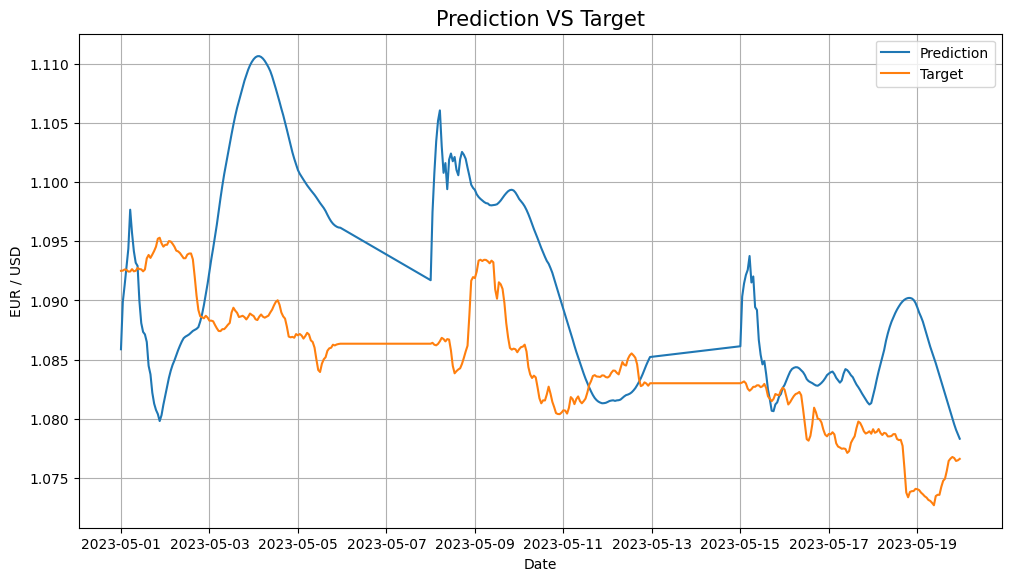

In [20]:
fig, ax = plt.subplots(figsize=(10, 5.7), layout='constrained')
ax.plot(xx, y_pre, label='Prediction')  # Plot some data on the (implicit) Axes.
ax.plot(xx, y_true, label='Target')  # etc.
ax.set_xlabel('Date')
ax.set_ylabel('EUR / USD')
ax.set_title('Prediction VS Target',fontsize=15)
plt.legend()

In [21]:
lstm_model.save("LSTM-Model.keras")


# Conclusion
 in my opinion, this model does not have an accurate prediction, but it can predict trends to some extent, and using this model along with other trading strategies can definitely help.
I hope this notebook is helpful. Thank you for your support